<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_11ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Tree Classifier:
Single Decision Tree: A Random Tree is a single decision tree that uses a random subset of features at each split instead of all features.

Prevents Overfitting: By limiting the number of features considered at each split, it reduces overfitting compared to regular decision trees.

Disadvantages: It can still overfit if the tree grows too deep and generally performs worse than ensemble methods.

Random Forest Classifier:
Ensemble of Trees: Random Forest is an ensemble method that builds multiple decision trees using bootstrapped datasets and a random subset of features for each split.

Improved Accuracy: It averages the predictions from multiple trees, improving accuracy and robustness.

Robust to Overfitting: The aggregation of many trees reduces the overfitting problem that individual decision trees face.

Uses: It's widely used for both classification and regression tasks, and also helps in feature importance estimation.

Comparison:
Random Tree: One decision tree, faster to train, but prone to overfitting and lower accuracy.

Random Forest: Multiple trees, better accuracy, more robust to overfitting, but computationally heavier.

Conclusion: Random Forest outperforms Random Tree due to its ensemble approach, making it ideal for complex datasets and high-accuracy tasks.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Check the column names of the dataset
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


Decision Tree Accuracy: 0.5700

Classification Report:
               precision    recall  f1-score   support

        High       0.23      0.26      0.24        43
         Low       0.64      0.68      0.66       244
      Medium       0.48      0.46      0.47       145
   Very High       0.49      0.47      0.48        51
    Very Low       0.70      0.63      0.67       117

    accuracy                           0.57       600
   macro avg       0.51      0.50      0.50       600
weighted avg       0.57      0.57      0.57       600



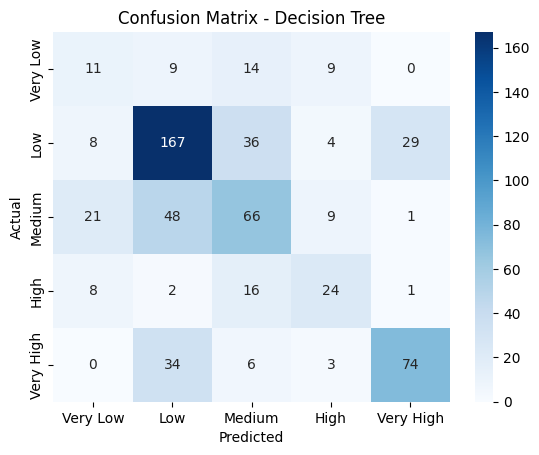

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and fill missing values
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = pd.cut(df['median_house_value'], bins=[0, 100000, 200000, 300000, 400000, np.inf],
           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Accuracy: 0.6300

Classification Report:
               precision    recall  f1-score   support

        High       0.31      0.26      0.28        43
         Low       0.62      0.85      0.72       244
      Medium       0.60      0.48      0.53       145
   Very High       0.67      0.43      0.52        51
    Very Low       0.82      0.58      0.68       117

    accuracy                           0.63       600
   macro avg       0.60      0.52      0.55       600
weighted avg       0.64      0.63      0.62       600



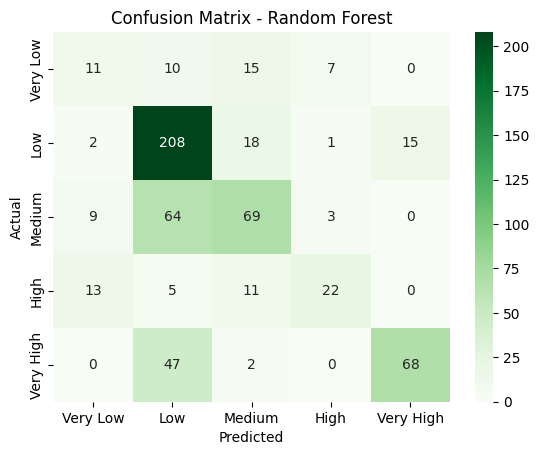

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and fill missing values
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = pd.cut(df['median_house_value'], bins=[0, 100000, 200000, 300000, 400000, np.inf],
           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Displaying comparison of accuracies
print("\nComparison of Models:")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")



Comparison of Models:
Decision Tree Accuracy: 0.5700
Random Forest Accuracy: 0.6300
